In [118]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [119]:
fdf = pd.read_csv('creditcard.csv')[:80_000]
fdf[fdf['Class']==1]['Class'].count()

196

In [143]:
df = pd.read_csv('creditcard.csv')[:80_000]
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [144]:
X = df.drop(columns = ['Time', 'Amount', 'Class']).values
y = df['Class'].values
f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

In [122]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000) # for 0(non fraud) weight is 1, for 1(fraud case) weight is 2; means it'll try to find more fraud cases
mod.fit(X, y).predict(X).sum()

171

do some settings to get the best value for class weight by grid search

In [123]:
lr = LogisticRegression()
??lr.score

Signature: lr.score(X, y, sample_weight=None)
Source:   
    def score(self, X, y, sample_weight=None):
        """
        Return the mean accuracy on the given test data and labels.

        In multi-label classification, this is the subset accuracy
        which is a harsh metric since you require for each sample that
        each label set be correctly predicted.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples.

        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            True labels for `X`.

        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights.

        Returns
        -------
        score : float
            Mean accuracy of ``self.predict(X)`` w.r.t. `y`.
        """
        from .metrics import accuracy_score

        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
File:      c:\users\hp\anaconda3\lib\site-packages\s

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1, 4)]},
    scoring={'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)},
    refit= 'precision', # choose the best model best on this score
    return_train_score=True,
    cv=4,
    n_jobs=-1 # grid search occurs in parallel
)
grid.fit(X, y);

In [125]:
from sklearn.metrics import precision_score, recall_score

print(recall_score(y, grid.predict(X)))
print(precision_score(y, grid.predict(X)))

0.5918367346938775
0.7682119205298014


In [126]:
pd.DataFrame(grid.cv_results_) #we didn't give any metric still got the score because it comes from model

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split3_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,mean_train_recall_score,std_train_recall_score
0,1.462408,0.260724,0.034731,0.006095,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.281250,1.0,0.952381,0.857143,...,0.122449,0.545918,0.331397,3,0.863946,0.585034,0.530612,0.693878,0.668367,0.127301
1,1.223295,0.343506,0.033481,0.003202,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.190678,1.0,0.955556,0.812500,...,0.265306,0.602041,0.297672,2,0.870748,0.659864,0.632653,0.782313,0.736395,0.095889
2,1.159928,0.086192,0.024237,0.006529,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.154882,1.0,0.955556,0.800000,...,0.326531,0.627551,0.281816,1,0.870748,0.714286,0.680272,0.816327,0.770408,0.076568


In [127]:
pd.DataFrame(grid.cv_results_) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split3_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,mean_train_recall_score,std_train_recall_score
0,1.462408,0.260724,0.034731,0.006095,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.281250,1.0,0.952381,0.857143,...,0.122449,0.545918,0.331397,3,0.863946,0.585034,0.530612,0.693878,0.668367,0.127301
1,1.223295,0.343506,0.033481,0.003202,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.190678,1.0,0.955556,0.812500,...,0.265306,0.602041,0.297672,2,0.870748,0.659864,0.632653,0.782313,0.736395,0.095889
2,1.159928,0.086192,0.024237,0.006529,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.154882,1.0,0.955556,0.800000,...,0.326531,0.627551,0.281816,1,0.870748,0.714286,0.680272,0.816327,0.770408,0.076568


now that the gridsearch is good set up we can do a proper run by tweaking a little settings:

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]}, #linspace should give higher resolution on the effect of class weight
    scoring={'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score)},
    refit= 'precision', # choose the best model best on this score
    return_train_score=True,
    cv=10, # more cross validation means accurate metrics but longer to run
    n_jobs=-1 # grid search occurs in parallel
)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [129]:
pd.DataFrame(grid.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_recall,split3_train_recall,split4_train_recall,split5_train_recall,split6_train_recall,split7_train_recall,split8_train_recall,split9_train_recall,mean_train_recall,std_train_recall
0,1.602736,0.218622,0.019226,0.006404,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.0,0.463415,0.583333,1.0,...,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,1.571817,0.129827,0.016988,0.002601,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.0,0.463415,0.583333,1.0,...,0.683616,0.627119,0.670455,0.647727,0.630682,0.687500,0.698864,0.687500,0.680239,0.050286
2,1.455717,0.203212,0.019588,0.004315,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.0,0.463415,0.583333,1.0,...,0.740113,0.683616,0.710227,0.698864,0.687500,0.715909,0.744318,0.727273,0.724454,0.043881
3,1.594631,0.092649,0.015590,0.001854,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.0,0.452381,0.583333,1.0,...,0.785311,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749978,0.039589
4,1.262673,0.233330,0.016090,0.001866,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.0,0.452381,0.583333,1.0,...,0.824859,0.740113,0.755682,0.744318,0.727273,0.778409,0.784091,0.761364,0.771498,0.037959


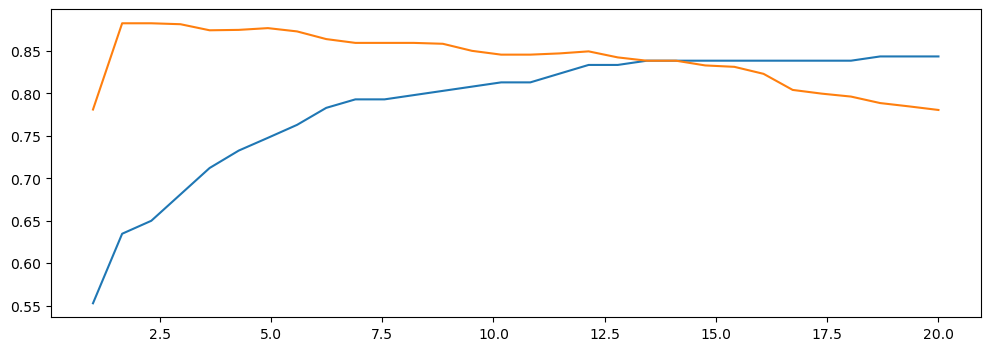

In [130]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']],
            df_results[score],
            label=score)

on far left we get the most precision, and on far right we get more recall we need a model with something on the middle for a good model where the two lines meet, so we'll use f1 score it balances both precision and recall.
let's do it

In [131]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)
# make_scorer(min_recall_precision, greater_is_better=False)
# ?make_scorer

In [132]:
# s = make_scorer(min_recall_precision)
# ??s

make our function such that we no longer need to use make scorer for it in the grid search settings

In [133]:
def min_recall_precision(estimator, X, y_true, sample_weight=None):
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

##### _class_weight means this class should get more attention_
##### _sample_weight allows us to pass data that this row is more important than this other row_

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

def min_recall_precision(est, X, y_true, sample_weight=None): # sample weight are the rows that should be given more attention
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]}, #linspace should give higher resolution on the effect of class weight
    scoring={'precision': make_scorer(precision_score),
             'recall': make_scorer(recall_score),
            'min_both': min_recall_precision},
    refit= 'min_both', # choose the best model best on this score
    return_train_score=True,
    cv=10, # more cross validation means accurate metrics but longer to run
    n_jobs=-1 # grid search occurs in parallel
)
grid.fit(X, y, sample_weight=np.log(1 + df['Amount']));

In [135]:
# np.log(1 + df['Amount'])

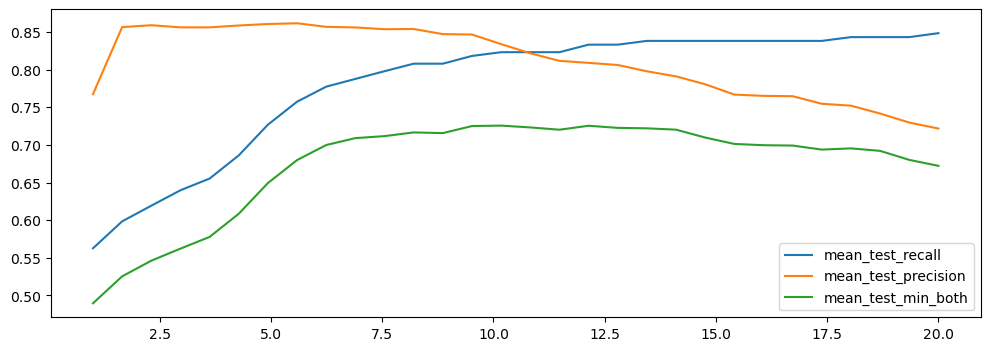

In [136]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']],
            df_results[score],
            label=score)
plt.legend();

class weight on x axis, scores on y axis

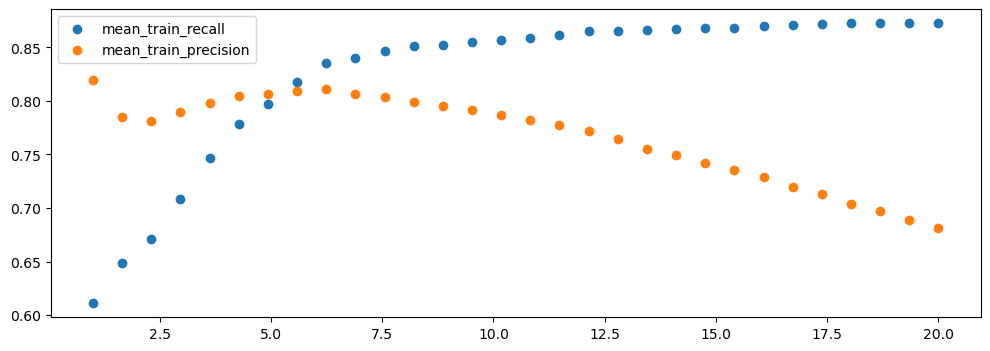

In [139]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision']:
    plt.scatter([_[1] for _ in df_results['param_class_weight']],
            df_results[score.replace('test', 'train')],
            label=score)
plt.legend();

In [138]:
# grid.get_params()

since fraud is rare and an outlier we can do use outlier detection instead of logisticregression

In [151]:
from collections import Counter
from sklearn.ensemble import IsolationForest
mod = IsolationForest().fit(X)
# Counter(mod.predict(X))
np.where(mod.predict(X) == -1, 1, 0) # if its -1 then 1(fraud) else 0(no fraud)

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)},
    scoring={'precision': outlier_precision,
            'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)
grid.fit(X, y);

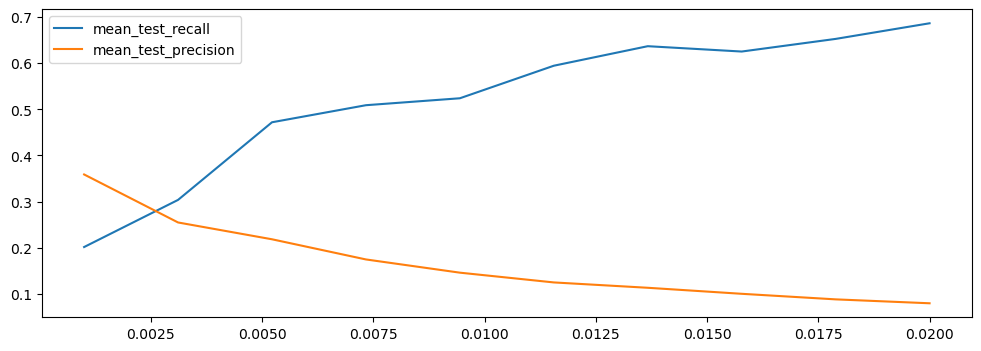

In [158]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot(df_results['param_contamination'],
            df_results[score],
            label=score)
plt.legend();

On x axis we have the hyper parameters and on y axis we have our score